# Predicting Vehicle MPG

# Importing Data

In [1]:
import os
import pandas as pd
import numpy as np

os.getcwd()

headers = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name']

auto_data = pd.read_csv('Data-CSVs/auto-mpg.data', delimiter='\s+', names=headers)

auto_data.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl


# Sectioning Off 20% of Data

In [2]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(auto_data, test_size=0.2, random_state=42)
#splits the training and testing set for us
#function has two returns so we need to give two variables at the beginning

In [3]:
print(len(train_set), "train +", len(test_set), "test")

318 train + 80 test


# Visualizing Data

In [4]:
train_set.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000
mean,23.608176,5.430818,191.904088,2969.015723,15.639937,76.103774,1.591195
std,7.930574,1.684947,102.983802,840.617729,2.763269,3.603177,0.811696
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,98.500000,2220.000000,13.900000,73.000000,1.000000
50%,22.450000,4.000000,148.500000,2822.500000,15.500000,76.000000,1.000000
75%,29.725000,6.000000,259.500000,3597.250000,17.300000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [5]:
#here I am using the DataFrame.hist() method that comes with pandas
#it's kinda poopy

train_set.hist(bins=25)

import matplotlib.pyplot as plt

plt.show()

<Figure size 640x480 with 9 Axes>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012972169608>,
      dtype=object)

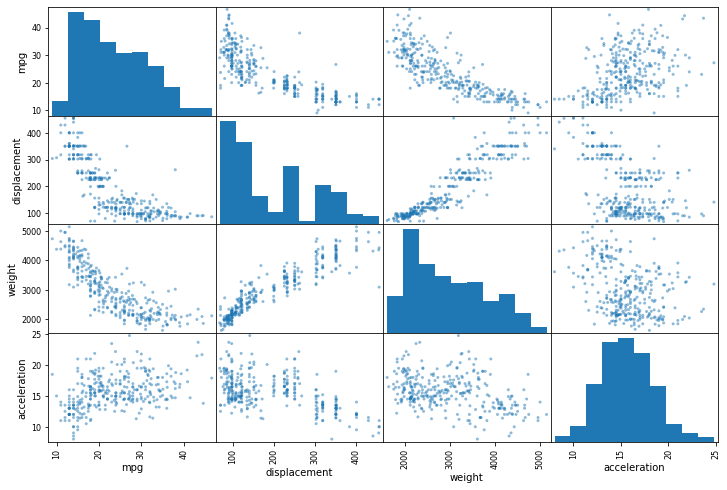

In [6]:
#the book used a scatter matrix to map all the data against itself
#It is a good way to narrow down your options and see what attributes correlate

from pandas.plotting import scatter_matrix

attributes = ['mpg','displacement','weight','acceleration']

scatter_matrix(train_set[attributes], figsize=(12,8))

In [7]:
#This creates a correlation matrix to see what data is correlated with what attributes
#we can see that model year has a slightly positive correlation and 
#weight has a largely negative correlation

#perhaps we should use weight and a linear regression? (phil's thoughts)

train_set_corr = train_set.corr()

train_set_corr['mpg'].sort_values(ascending=False)

mpg             1.000000
model year      0.586743
origin          0.562710
acceleration    0.390101
cylinders      -0.770459
displacement   -0.801543
weight         -0.827333
Name: mpg, dtype: float64

# Training the Model

In [8]:
from sklearn.linear_model import LinearRegression
import numpy as np

from matplotlib import pyplot as py

train_set_weight = []

for e, i in enumerate(train_set['weight'],start=1):
    train_set_weight.append([e,i])

train_set_mpg = train_set['mpg'].values #grab the mpg to be our output variable


#print(train_set_weight)

model = LinearRegression()

model.fit(train_set_weight, train_set_mpg)
#create a linear regression and train it with weight x mpg




LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

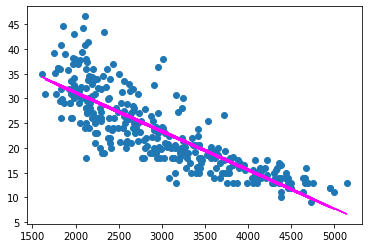

In [9]:

pred_y = model.predict(train_set_weight)

py.scatter(train_set['weight'].values,train_set['mpg'].values )
py.plot(train_set['weight'].values, pred_y,color='magenta')

# Evaluating the Model with the Test set

In [20]:
from sklearn.metrics import mean_squared_error

#Now, we test our model against the test set

#First we formatted our data so it could fit into the model
mpg_predictions = []
for e, i in enumerate(test_set['weight'],start=1):
    mpg_predictions.append([e,i])

mpg_predictions = model.predict(mpg_predictions) #model prediction from test set
mpg_actual = test_set['mpg'].values #actual y values from test set

#calculating the RMSE for our model
mse = mean_squared_error(mpg_actual,mpg_predictions)
mse = np.sqrt(mse)
mse

3.8492763508811185

# Adding Confusion Matrix

In [21]:
import sklearn.metrics as ms

# highest value is 1
ms.explained_variance_score(mpg_actual, mpg_predictions)

0.7257934400725006

# Cross Validating the Data

In [19]:
from sklearn.model_selection import cross_val_score

#Now, instead of using an 80-20 split, we will use the whole data set and cross validation

#first, we get our data from the original DataFrame

auto_weight = []
for e, i in enumerate(auto_data['weight'],start=1):
    auto_weight.append([e,i])

auto_mpg = auto_data['mpg']


scores = cross_val_score(model,auto_weight,auto_data['mpg'], cv=9)

scores = np.sqrt(scores)

print(scores)

[0.74401722 0.92689082 0.73713963 0.86671873 0.91812729 0.8617172
 0.82518487 0.34544408 0.71319392]
